## MLPP HW1 - Diagnostic - Part 1

### Importing & Exploring 311 Data

In [1]:
import warnings
warnings.simplefilter('ignore')

%run helper.py
%matplotlib inline

The Chicago Data Portal has an API, but using their link only gives the 1000 most recent requests. Instead, we can load the data from the file export and then save versions containing only the requests from 2017.

In [2]:
buildings_url = 'https://data.cityofchicago.org/api/views/7nii-7srd/rows.csv?accessType=DOWNLOAD'
graffiti_url = 'https://data.cityofchicago.org/api/views/hec5-y4x5/rows.csv?accessType=DOWNLOAD'
lights_url = 'https://data.cityofchicago.org/api/views/t28b-ys7j/rows.csv?accessType=DOWNLOAD'

I loaded the files using the function and links above and then pickled the filtered datasets based on date requested, limiting entries to those in 2017. After loading the data, it seems not ideal to combine the three dataframes because the fields in the buildings dataset are just so different from the fields in the graffiti and lights data.

In [3]:
#buildings = load(buildings_url, 'DATE SERVICE REQUEST WAS RECEIVED')
#graffiti = load(graffiti_url)
#lights = load(lights_url)

#buildings.to_pickle('vacant_buildings_17.pkl')
#graffiti.to_pickle('graffiti_17.pkl')
#lights.to_pickle('alley_lights_17.pkl')

In [4]:
buildings = pd.read_pickle('vacant_buildings_17.pkl')
graffiti = pd.read_pickle('graffiti_17.pkl')
lights = pd.read_pickle('alley_lights_17.pkl')

In [5]:
buildings = drop_if(buildings, col_list=['Ward', 'ZIP CODE', 'Police District', 'Community Area'])
graffiti = drop_if(graffiti)
lights = drop_if(lights)

### Number of requests of each type

In [6]:
service_counts = [int(buildings['SERVICE REQUEST TYPE'].value_counts()),
                  int(graffiti['Type of Service Request'].value_counts()),
                  int(lights['Type of Service Request'].value_counts())]
service_types = [list(set(buildings['SERVICE REQUEST TYPE']))[0],
                 list(set(graffiti['Type of Service Request']))[0],
                 list(set(lights['Type of Service Request']))[0]]
for x, y in zip(service_counts, service_types):
    print(y, x)

Vacant/Abandoned Building 3665
Graffiti Removal 112741
Alley Light Out 27887


|Request Type|Number of Requests|
|:--------:|:---:|
|Vacant/Abandoned Buildings| 3665|
|Graffiti Revomal |112741|
|Alley Light Out | 27887|


In [1]:
# create graph of total requests by month over time with all three datasets

### Exploring Graffiti Removal Requests

In [7]:
completed_graffiti = compute_response_time(graffiti)
graffiti_clean = add_month_bins(completed_graffiti)

In [8]:
print(graffiti.shape, graffiti_clean.shape)

(112741, 19) (112735, 21)


In 2017, only 6 graffiti requests were listed as not completed. These requests were likely made at the end of the year. 

#### Number of Requests per Month

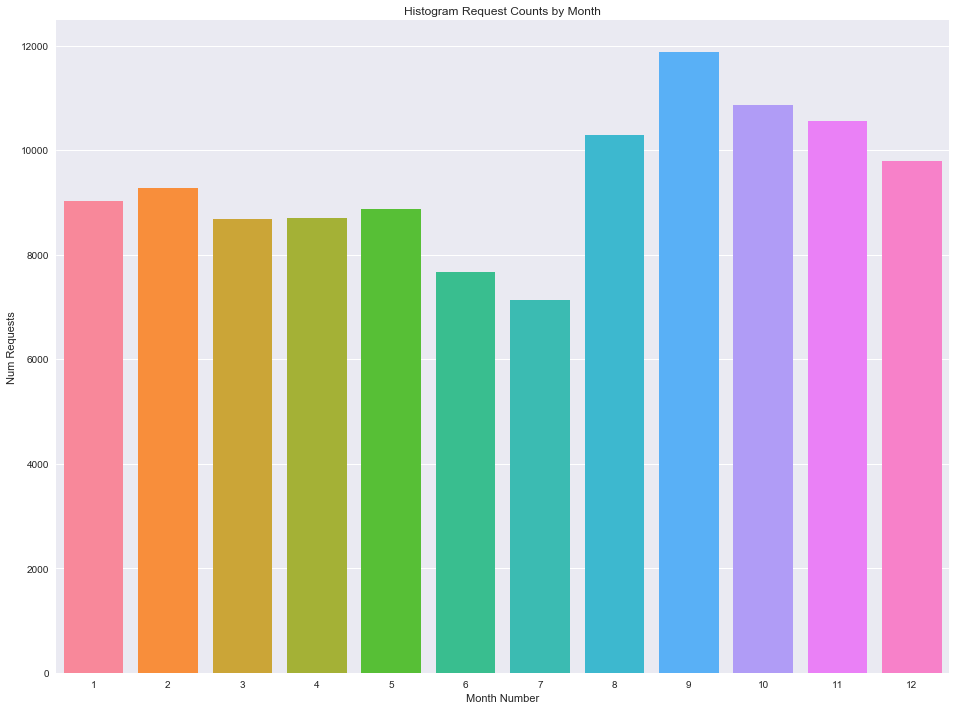

In [9]:
hist_plt(graffiti_clean, 'Month', 'Month Number', vertical=False, sort=False)

#### Number of Requests by Zip Code

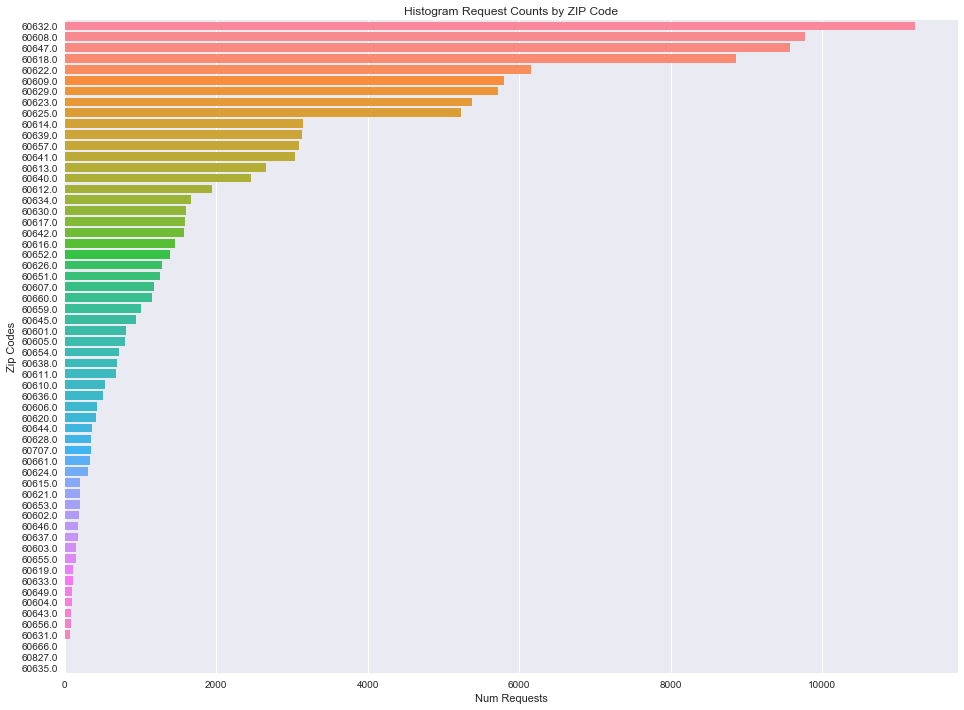

In [10]:
hist_plt(graffiti_clean, 'ZIP Code', 'Zip Codes', vertical=True, sort=True)

#### Requests by Where is the Graffiti Located

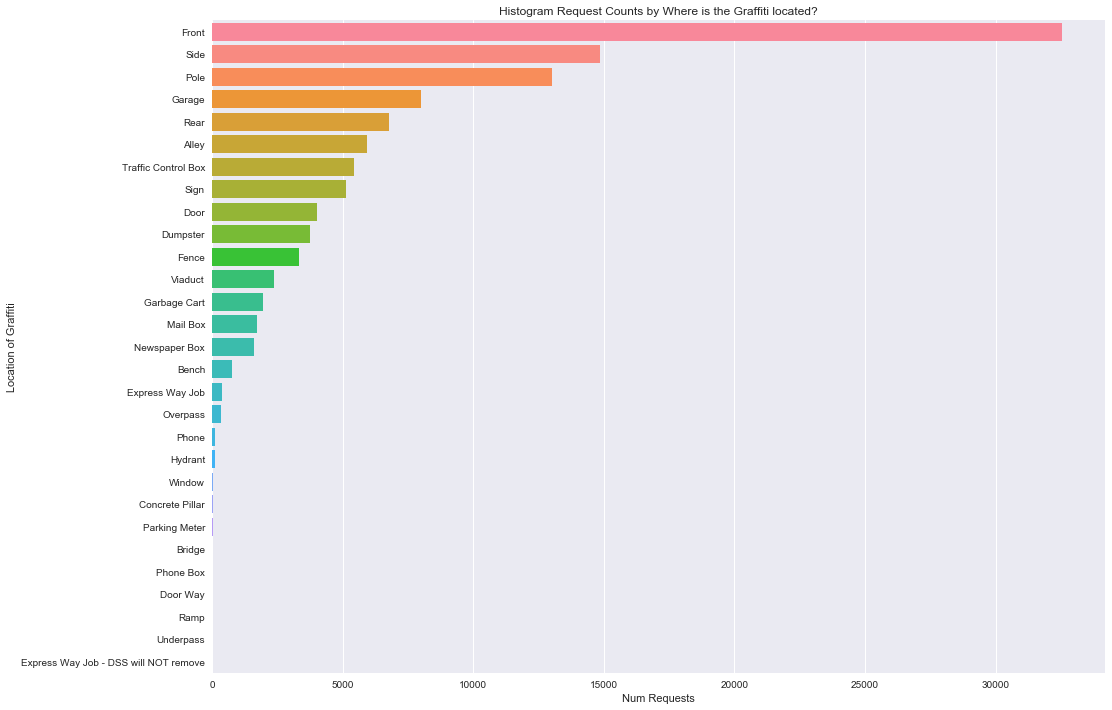

In [11]:
hist_plt(graffiti_clean, 'Where is the Graffiti located?', 'Location of Graffiti', vertical=True, sort=True)

#### Common Locations by Zip Codes

In [12]:
graffiti_clean['Where is the Graffiti located?'].groupby(graffiti_clean['ZIP Code']).value_counts()

ZIP Code  Where is the Graffiti located?
60601.0   Front                             349
          Pole                              121
          Side                               95
          Traffic Control Box                50
          Overpass                           45
          Door                               40
          Fence                              25
          Sign                               22
          Alley                              13
          Dumpster                           10
          Bench                               7
          Newspaper Box                       7
          Concrete Pillar                     6
          Express Way Job                     4
          Garbage Cart                        4
          Rear                                3
          Garage                              2
          Viaduct                             2
          Bridge                              1
          Mail Box                            1

#### Requests by Surface Type

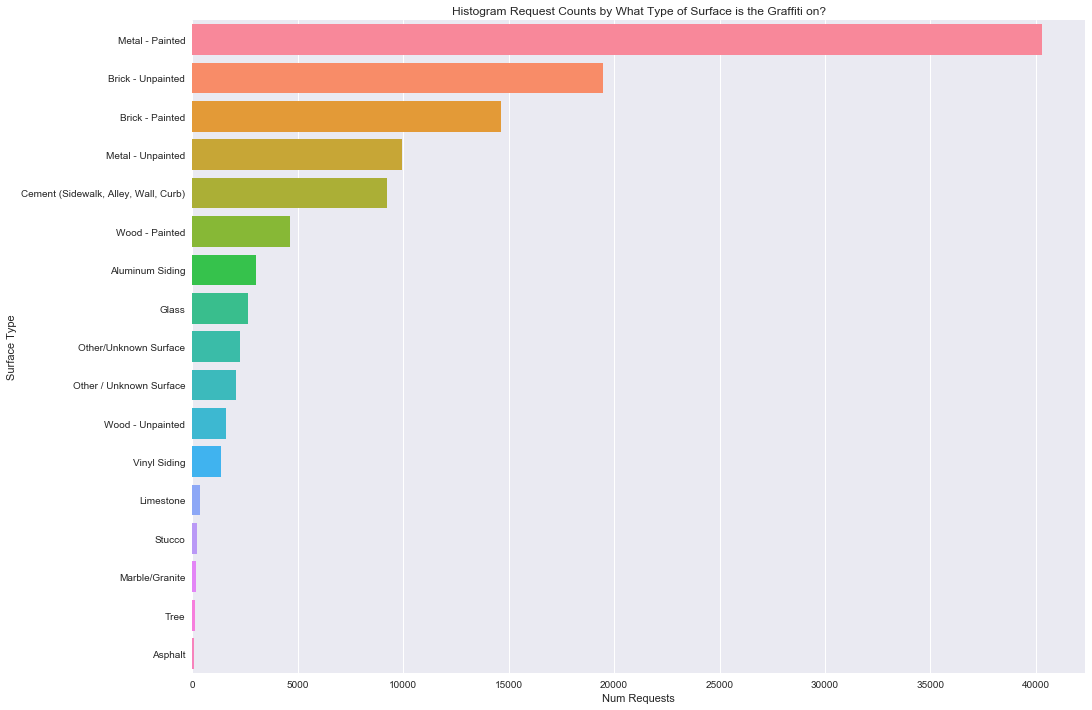

In [13]:
hist_plt(graffiti_clean, 'What Type of Surface is the Graffiti on?', 'Surface Type', vertical=True, sort=True)

#### Common Surfaces by Zip Code

In [14]:
graffiti_clean['What Type of Surface is the Graffiti on?'].groupby(graffiti_clean['ZIP Code']).value_counts()

ZIP Code  What Type of Surface is the Graffiti on?
60601.0   Metal - Painted                             319
          Cement (Sidewalk, Alley, Wall, Curb)        244
          Brick - Unpainted                            63
          Brick - Painted                              51
          Metal - Unpainted                            26
          Glass                                        23
          Wood - Painted                               21
          Limestone                                    18
          Other / Unknown Surface                      18
          Marble/Granite                                7
          Other/Unknown Surface                         7
          Aluminum Siding                               3
          Vinyl Siding                                  3
          Asphalt                                       2
          Wood - Unpainted                              2
60602.0   Metal - Painted                             103
          Brick - Unp

#### Analyzing Response Times

Below we can see the mean response time in days grouped by zip codes as well as the number of requests by zip code. This is obviously difficult to read, so 

In [15]:
max_min_count(graffiti_clean)

60632.0 had 11225.0 requests, which was the most overall 

60635.0 had 2.0 requests, which was the least overall 

60649.0 had an average response time of 1.09375 day, which was the highest overall 

60655.0 had an average response time of 0.16778523489932887 day, which was the lowest overall 

Below is a summary of response times for all zip codes 



,count,mean,std,min,25%,50%,75%,max
ZIP Code,,,,,,,,
60601.0,807.0,0.742255,1.729323,0.0,0.00,0.0,1.00,16.0
60602.0,193.0,0.886010,1.892271,0.0,0.00,1.0,1.00,22.0
60603.0,152.0,0.914474,0.989642,0.0,0.00,1.0,1.00,4.0
60604.0,92.0,0.956522,1.194429,0.0,0.00,1.0,1.00,5.0
60605.0,795.0,0.738365,1.078517,0.0,0.00,0.0,1.00,15.0
60606.0,431.0,0.419954,0.825450,0.0,0.00,0.0,1.00,5.0
60607.0,1183.0,0.555368,1.090694,0.0,0.00,0.0,1.00,16.0
60608.0,9779.0,0.645260,1.109582,0.0,0.00,0.0,1.00,35.0
60609.0,5800.0,0.526207,1.293198,0.0,0.00,0.0,1.00,56.0


### Exploring Alley Lights Out Requests

In [16]:
completed_lights = compute_response_time(lights)
lights_clean = add_month_bins(completed_lights)

In [17]:
print(lights.shape, lights_clean.shape)

(27887, 16) (24010, 18)


#### Number of Requests per Month

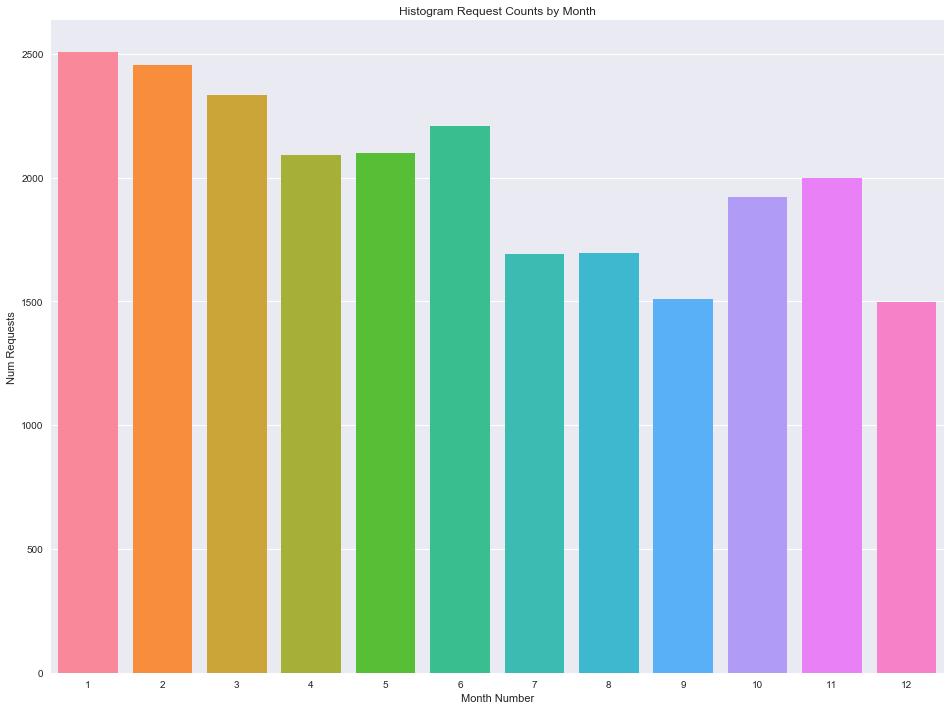

In [18]:
hist_plt(lights_clean, 'Month', 'Month Number', vertical=False, sort=False)

#### Number of Requests by Zip Code

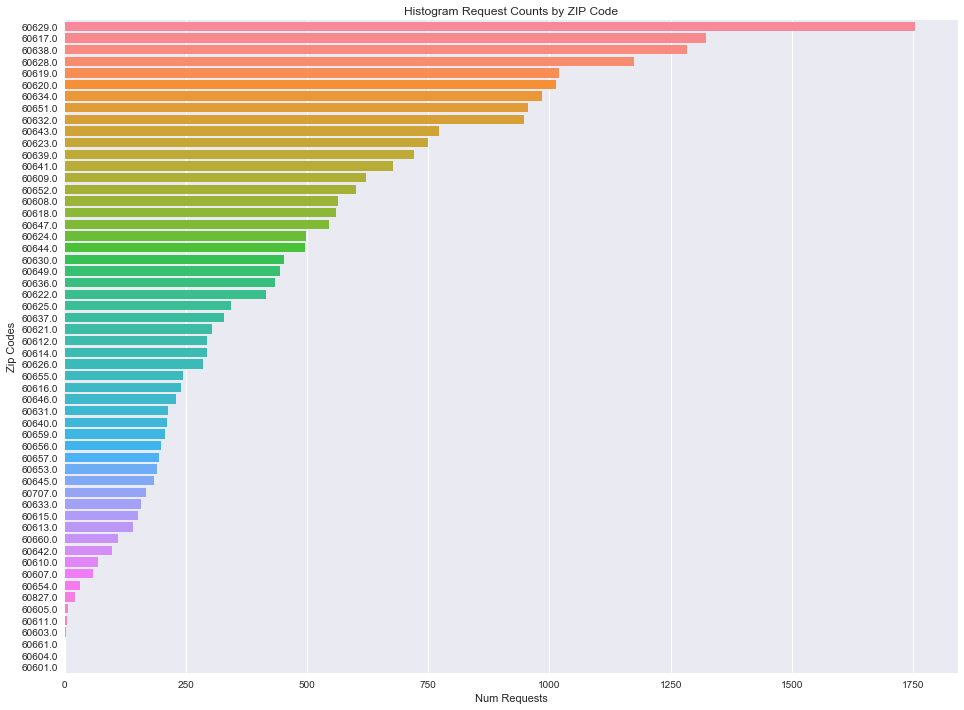

In [19]:
hist_plt(lights_clean, 'ZIP Code', 'Zip Codes', vertical=True, sort=True)

#### Analyzing Response Times

Below we can see the mean response time in days grouped by zip codes as well as the number of requests by zip code. This is obviously difficult to read, so 

In [20]:
max_min_count(lights_clean)

60629.0 had 1754.0 requests, which was the most overall 

60601.0 had 1.0 requests, which was the least overall 

60661.0 had an average response time of 141.0 day, which was the highest overall 

60601.0 had an average response time of 1.0 day, which was the lowest overall 

Below is a summary of response times for all zip codes 



,count,mean,std,min,25%,50%,75%,max
ZIP Code,,,,,,,,
60601.0,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
60603.0,3.0,43.333333,35.004762,8.0,26.00,44.0,61.00,78.0
60604.0,1.0,25.000000,NaN,25.0,25.00,25.0,25.00,25.0
60605.0,6.0,48.000000,68.553629,0.0,13.25,22.0,42.75,184.0
60607.0,59.0,41.423729,49.602281,0.0,8.00,16.0,65.00,252.0
60608.0,564.0,49.441489,64.440192,0.0,1.00,19.0,76.25,360.0
60609.0,622.0,37.421222,57.512158,0.0,1.00,9.0,51.75,350.0
60610.0,69.0,42.492754,54.963524,0.0,3.00,27.0,56.00,242.0
60611.0,5.0,15.200000,24.056184,0.0,0.00,5.0,14.00,57.0


### Exploring Vacant/Abandoned Building Requests

In [21]:
buildings_clean = add_month_bins(buildings, 'DATE SERVICE REQUEST WAS RECEIVED')

#### Number of Requests per Month

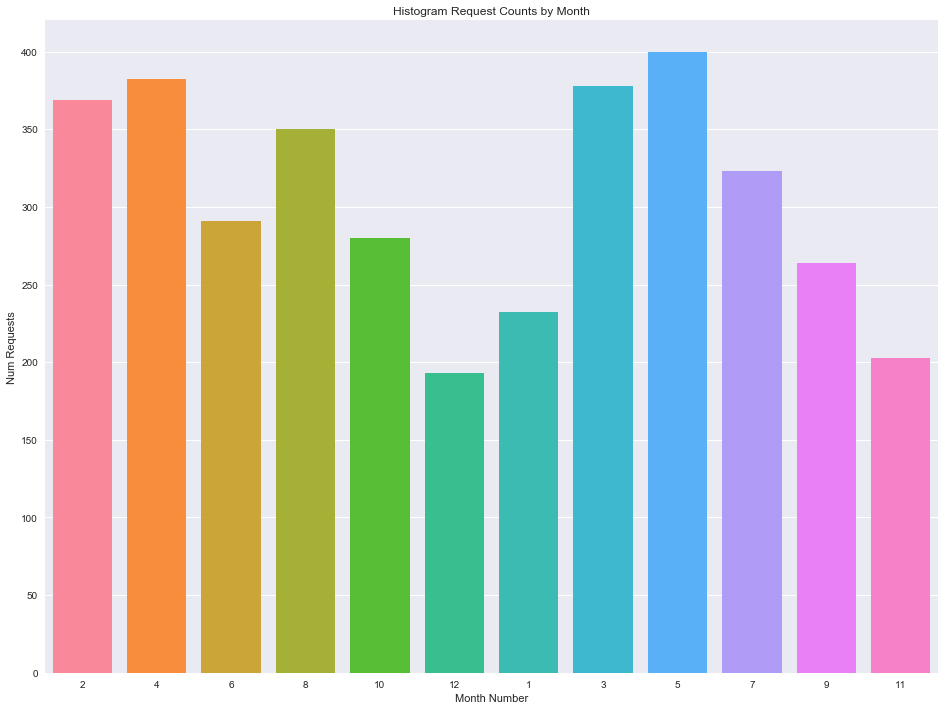

In [22]:
hist_plt(buildings_clean, 'Month', 'Month Number', vertical=False, sort=False)

#### Number of Requests by Zip Code

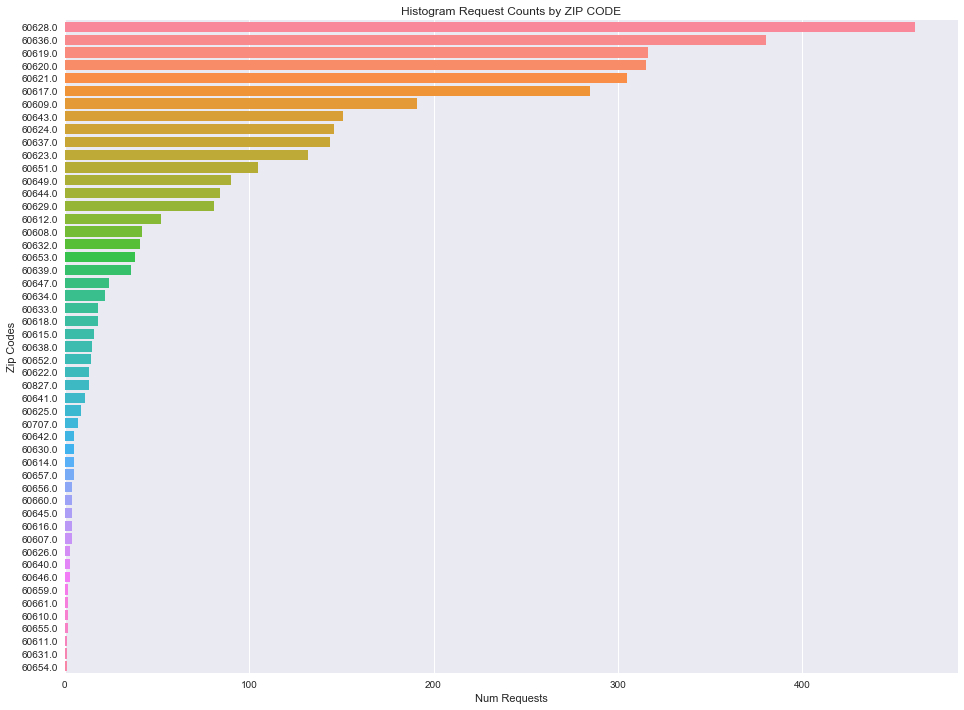

In [23]:
hist_plt(buildings_clean, 'ZIP CODE', 'Zip Codes', vertical=True, sort=True)

#### Number of Requests by Police Area

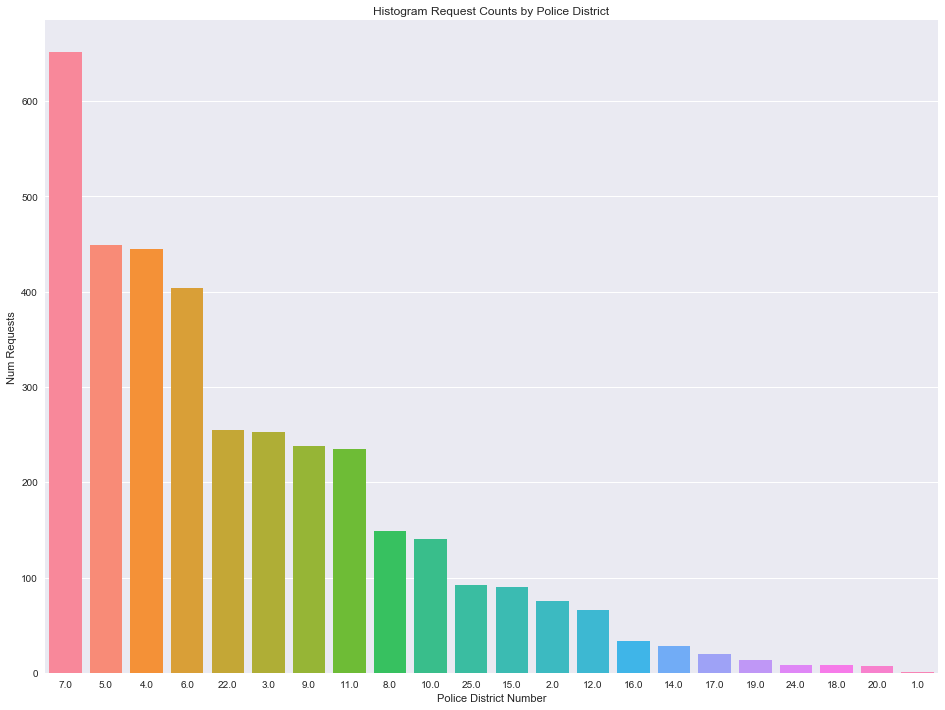

In [24]:
hist_plt(buildings_clean, 'Police District', 'Police District Number', vertical=False, sort=True)

#### Common Relative Locations of Vacant Buildings

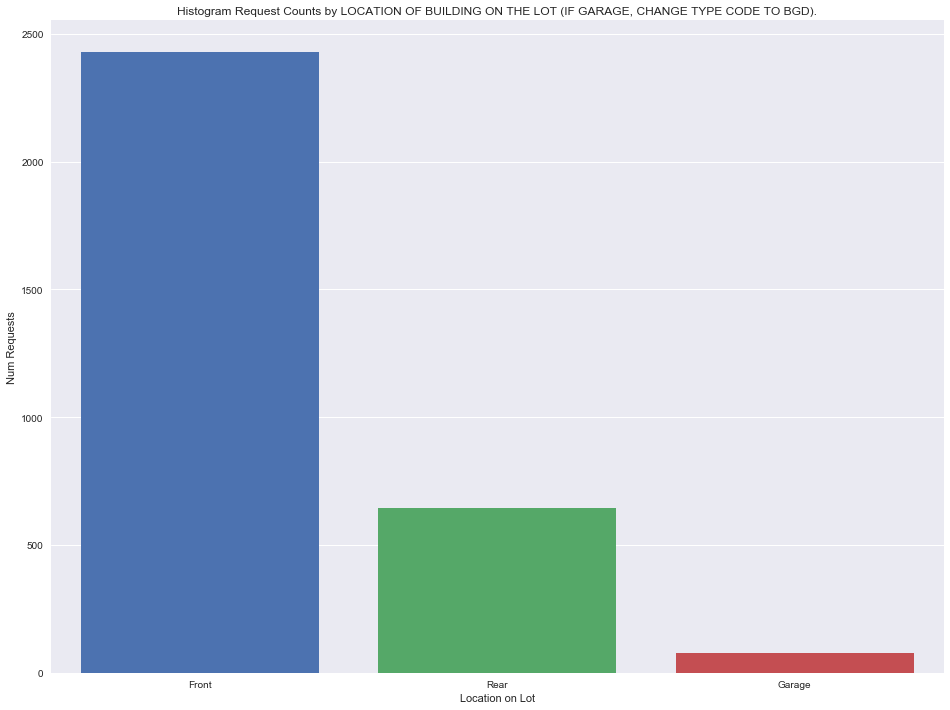

In [25]:
hist_plt(buildings_clean, 'LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).', 'Location on Lot', vertical=False, sort=True)